# 📊 AI Events & Market Impact Analysis

"""
This project analyzes the relationship between AI-related events, 
company revenue growth, and stock performance. 

Goals:
1. Explore dataset quality (missing values, duplicates, data types).
2. Analyze AI revenue growth distribution by event type.
3. Compare stock market impact on event vs. non-event days.
4. Identify the most frequent events and their contribution to growth.
5. Conclude with actionable insights.

This notebook demonstrates data analysis, visualization, and storytelling 
skills relevant for a Data Analyst / Data Scientist role.
"""

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [40]:
# Load dataset
df = pd.read_csv(r"C:\Users\moham\Downloads\archive (5).zip")  # replace with your file path
print("✅ Dataset loaded successfully!")

# Peek at data
df.head()

✅ Dataset loaded successfully!


,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [6]:
# Shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (10959, 7)


In [8]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 0


In [10]:
# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64


In [42]:
print(df['Event'].isnull().sum())
print(df['Event'].value_counts(dropna=False))

10726
Event
NaN                                10726
AI speech recognition release         37
AI-powered search update              32
AI Ads Optimization upgrade           32
AI partnership deal                   32
AI Video Recommendation upgrade       29
AI ethics policy update               27
Cloud AI launch                       27
TensorFlow open-source release         1
LLaMA 2 release                        1
LLaMA 1 release                        1
Gemini AI release                      1
Bard chatbot launch                    1
MUM Search Model launch                1
BERT for Search launch                 1
AlphaGo beats Lee Sedol                1
DALL·E 2 release                       1
GPT-5 release (predicted)              1
GPT-4 release                          1
ChatGPT (GPT-3.5) launch               1
Codex release                          1
GPT-3 release                          1
GPT-2 release                          1
GPT-1 release                          1
LLaM

In [46]:
df['HasEvent'] = df['Event'].notna().astype(int)
df['Event'] = df['Event'].fillna("No Event")

In [48]:
df.head(1)

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,HasEvent
0,2015-01-01,OpenAI,5.92,0.63,-36.82,No Event,-0.36,0


In [12]:
# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_percent)



Missing Values Percentage:
Date                    0.000000
Company                 0.000000
R&D_Spending_USD_Mn     0.000000
AI_Revenue_USD_Mn       0.000000
AI_Revenue_Growth_%     0.000000
Event                  97.873894
Stock_Impact_%          0.000000
dtype: float64


In [14]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Date                    object
Company                 object
R&D_Spending_USD_Mn    float64
AI_Revenue_USD_Mn      float64
AI_Revenue_Growth_%    float64
Event                   object
Stock_Impact_%         float64
dtype: object


In [16]:
# Drop duplicates if any
df = df.drop_duplicates()

In [20]:
# Replace empty strings with NaN
df = df.replace("", np.nan)


In [22]:
# Fill numeric NaNs with median (robust against outliers)
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [28]:
# Fill categorical NaNs with mode
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
   df.fillna({col: df[col].mode()[0]}, inplace=True)


print("✅ Missing values handled successfully!")

✅ Missing values handled successfully!


## Time Line of AI Events

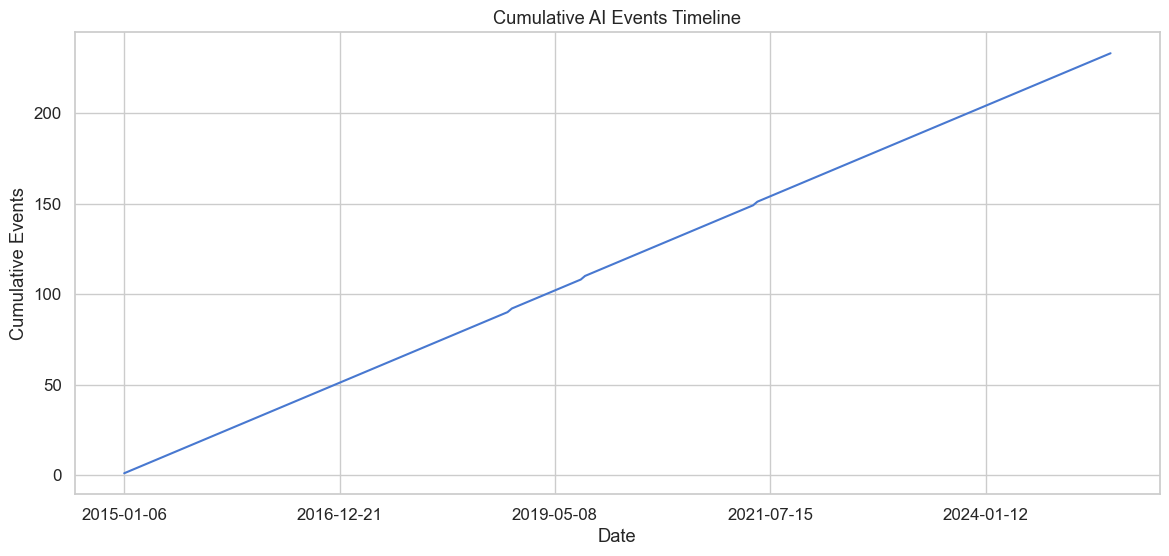

In [57]:
#Timeline of AI events
plt.figure(figsize=(14,6))
event_df = df[df['HasEvent']==1].groupby('Date')['Event'].count().cumsum()
event_df.plot()
plt.title("Cumulative AI Events Timeline")
plt.ylabel("Cumulative Events")
plt.xlabel("Date")
plt.show()

## Top AI Events

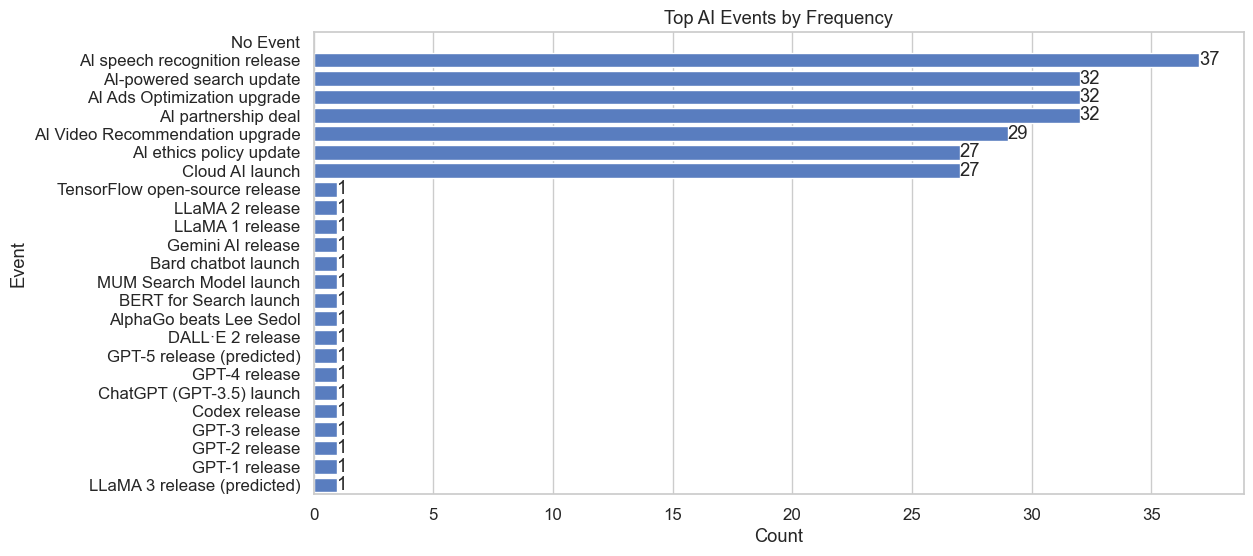

In [60]:
#Top AI Events

plt.figure(figsize=(12,6))
ax = sns.countplot(y="Event", data=df[df['Event'] != "No Event"], order=df['Event'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top AI Events by Frequency")
plt.xlabel("Count")
plt.ylabel("Event")
plt.show()

## R&D Spending vs AI Revenue

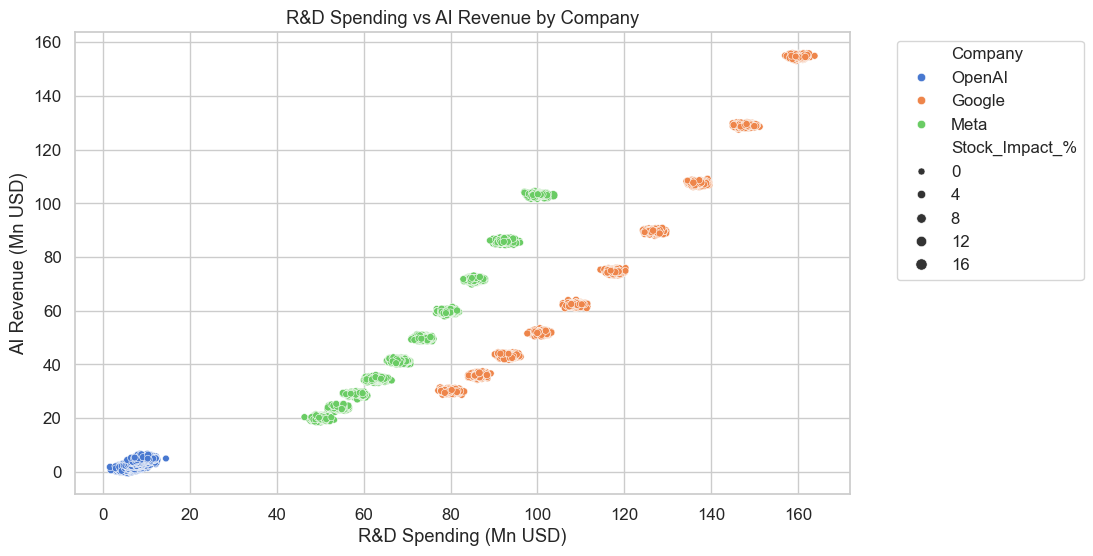

In [65]:
#R&D Spending vs AI Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x="R&D_Spending_USD_Mn", y="AI_Revenue_USD_Mn", hue="Company", size="Stock_Impact_%", data=df)
plt.title("R&D Spending vs AI Revenue by Company")
plt.xlabel("R&D Spending (Mn USD)")
plt.ylabel("AI Revenue (Mn USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Revenue Growth Distribution by Events

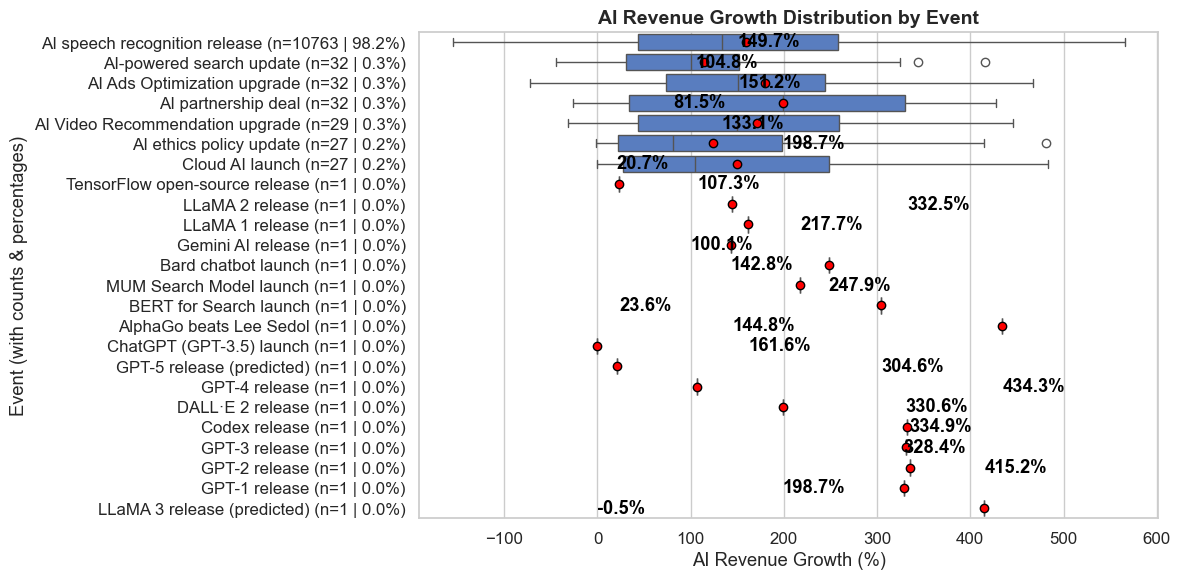

In [32]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(
    x="AI_Revenue_Growth_%", 
    y="Event", 
    data=df[df['Event'] != "No Event"],
    showmeans=True,
    meanprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"}
)

# Add median values
medians = df[df['Event'] != "No Event"].groupby("Event")["AI_Revenue_Growth_%"].median()
for i, event in enumerate(medians.index):
    ax.text(
        medians[event], i, f"{medians[event]:.1f}%", 
        va='center', ha='left', color='black', fontweight='bold'
    )

# Add counts & percentages
counts = df[df['Event'] != "No Event"]["Event"].value_counts()
total = len(df[df['Event'] != "No Event"])
new_labels = [f"{label} (n={counts[label]} | {counts[label]/total:.1%})" for label in counts.index]

ax.set_yticks(range(len(new_labels)))
ax.set_yticklabels(new_labels)

plt.title("AI Revenue Growth Distribution by Event", fontsize=14, fontweight="bold")
plt.xlabel("AI Revenue Growth (%)")
plt.ylabel("Event (with counts & percentages)")
plt.tight_layout()
plt.show()

## Stock Impact on Events vs Non-Events Days


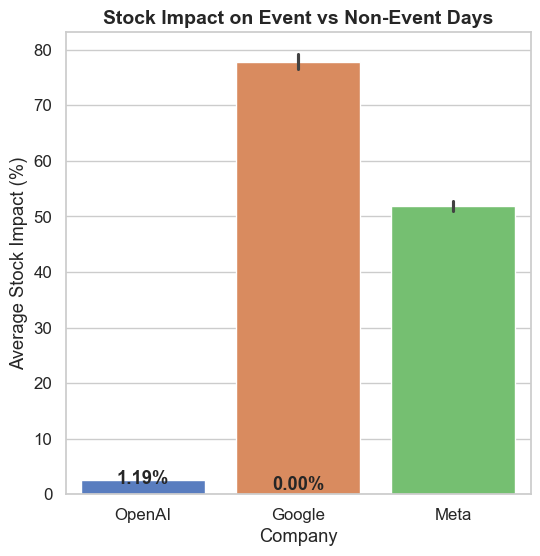

In [52]:
avg_stock_impact_event = df[df['HasEvent']==1]['Stock_Impact_%'].mean()
avg_stock_impact_noevent = df[df['HasEvent']==0]['Stock_Impact_%'].mean()

plt.figure(figsize=(6,6))
sns.barplot(
    data=df,
    x="Company",
    y="AI_Revenue_USD_Mn",
    hue="Company",              # Explicitly assign hue
    palette="muted",
    legend=False                # Hide the redundant legend
)
plt.ylabel("Average Stock Impact (%)")
plt.title("Stock Impact on Event vs Non-Event Days", fontsize=14, fontweight="bold")

for i, val in enumerate([avg_stock_impact_event, avg_stock_impact_noevent]):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom', fontweight="bold")

plt.show()

## Summary Statistics

In [55]:
total_events = df['HasEvent'].sum()
top_event = df[df['HasEvent'] == 1]['Event'].mode()[0]

print("Summary Statistics:")
print(f"- Total AI Events recorded: {total_events}")
print(f"- Most frequent AI Event: {top_event}")
print(f"- Average stock impact on event days: {avg_stock_impact_event:.2f}%")
print(f"- Average stock impact on non-event days: {avg_stock_impact_noevent:.2f}%")

Summary Statistics:
- Total AI Events recorded: 233
- Most frequent AI Event: AI speech recognition release
- Average stock impact on event days: 1.19%
- Average stock impact on non-event days: 0.00%
